In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data.csv')
data.dtypes[data.dtypes == 'int64']
X, y = data.drop(columns=['Bankrupt?']) , data['Bankrupt?']

In [5]:
categorical_columns = [' Net Income Flag'," Liability-Assets Flag"]
numerical_columns = [x for x in X.columns if x not in categorical_columns]

In [6]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps = [
  ('normalize', StandardScaler())
])
normalized = ColumnTransformer(transformers=[
  ('numerical', numerical_transformer,numerical_columns),
  ('categorical','passthrough',categorical_columns)
])
pipeline = Pipeline(steps = [
  ('normalization',normalized),
  ('Dimension red', PCA(n_components=55)),
  ('Classifier', LogisticRegressionCV(cv = 5,random_state=42,))
])
pipeline

Pipeline(steps=[('normalization',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  [' ROA(C) before interest '
                                                   'and depreciation before '
                                                   'interest',
                                                   ' ROA(A) before interest '
                                                   'and % after tax',
                                                   ' ROA(B) before interest '
                                                   'and depreciation after tax',
                                                   ' Operating Gross Margin',
                                                   ' Realized Sales Gross '
                                                   'Margin',
                                                   ' Operating Profit Rate',
                                                   ' Pre-ta...
                                                   ' Operating Profit Growth '
                                                   'Rate',
                                                   ' After-tax Net Profit '
                                                   'Growth Rate',
                                                   ' Regular Net Profit Growth '
                                                   'Rate',
                                                   ' Continuous Net Profit '
                                                   'Growth Rate',
                                                   ' Total Asset Growth Rate',
                                                   ' Net Value Growth Rate', ...]),
                                                 ('categorical', 'passthrough',
                                                  [' Net Income Flag',
                                                   ' Liability-Assets '
                                                   'Flag'])])),
                ('Dimension red', PCA(n_components=55)),
                ('Classifier', LogisticRegressionCV(cv=5, random_state=42))])

In [7]:
transformed = normalized.fit_transform(X)

In [8]:
normalized_df = pd.DataFrame(transformed, columns= X.columns)
normalized_df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025697,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.237123,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,1.0,0.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.025697,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793

In [9]:
#Checking for proper number of components
coverage = []
for i in range(1,normalized_df.shape[1],5):
  pca = PCA(n_components=i)
  pca.fit(normalized_df)
  coverage.append([i,np.sum(pca.explained_variance_ratio_)])
  if np.sum(pca.explained_variance_ratio_)>0.98:
    break


Text(0, 0.5, 'Number of Principal components')

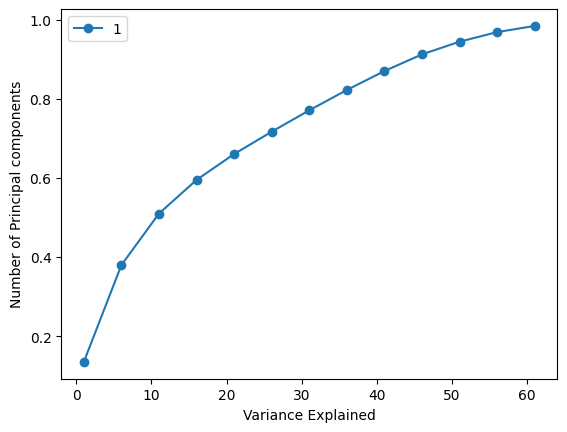

In [10]:
cov = pd.DataFrame(coverage)
cov.plot(kind = 'line',x = 0,y =1, marker='o')
plt.xlabel('Variance Explained')
plt.ylabel('Number of Principal components')

In [13]:
pca = PCA(n_components=52)
reduced_df= pca.fit_transform(normalized_df)
reduced_df.shape

(6819, 52)

In [14]:
# model Selection 
from sklearn.linear_model import LogisticRegressionCV
X_train , X_test, y_train, y_test = train_test_split(reduced_df,y, random_state= 42, test_size=0.2)
clf = LogisticRegressionCV(cv = 5,max_iter=200, scoring='f1')

In [15]:
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, max_iter=200, scoring='f1')

In [16]:
clf.score(X_test,y_test )

0.3076923076923077

In [17]:
data = pd.read_csv('data.csv')

In [19]:
corr=data.drop(columns=categorical_columns + ['Bankrupt?']).corr()

In [22]:
corr_pair = []
for i in range(len(corr.columns)):
  for j in range(len(corr.columns)):
    if i!=j and corr.iloc[i,j] !=1.0:
      corr_pair.append((corr.index[i],corr.index[j],abs(corr.iloc[i,j])))

In [24]:
corr_pair.sort(key = lambda x: x[2], reverse=True)
pair_df = pd.DataFrame(corr_pair)

In [25]:
df =pair_df[pair_df[2]>0.45]
df.head()

,0,1,2
0,Debt ratio %,Net worth/Assets,1.000000
1,Net worth/Assets,Debt ratio %,1.000000
2,Operating Gross Margin,Gross Profit to Sales,1.000000
3,Gross Profit to Sales,Operating Gross Margin,1.000000
4,Net Value Per Share (A),Net Value Per Share (C),0.999837


In [26]:
df1 = df[: : 2]

In [27]:
pair1 = df1.iloc[: ,0]
pair2 = df1.iloc[:,1]
df1.head()

,0,1,2
0,Debt ratio %,Net worth/Assets,1.000000
2,Operating Gross Margin,Gross Profit to Sales,1.000000
4,Net Value Per Share (A),Net Value Per Share (C),0.999837
6,Operating Gross Margin,Realized Sales Gross Margin,0.999518
8,Realized Sales Gross Margin,Gross Profit to Sales,0.999518


In [28]:
i = set(pair1)-set(pair2)
j = set(pair2)-set(pair1)
redundant =list(set(pair1))

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
check = data[numerical_columns]
check = check.drop(columns = redundant)
check.head()

,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Accounts Receivable Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Total income/Total expense,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.780985,1.256969e-04,0.0,0.000725,0.0,0.017560,0.022102,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.002259,0.001208,0.629951,0.021266,0.005024,0.001814,1.820926e-04,1.165007e-04,0.034164,0.392913,0.037135,0.001997,1.473360e-04,0.276920,0.001036,0.025592,0.002022,7.010000e+08,6.550000e+09,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.458609,0.520382,0.312905,0.118250,0.716845,0.009219,0.622879,0.601453,0.026601,0.564050,0.016469
1,0.781506,2.897851e-04,0.0,0.000647,0.0,0.021144,0.022080,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.006016,0.004039,0.635172,0.012502,0.005059,0.001286,9.360000e+09,7.190000e+08,0.006889,0.391590,0.012335,0.004136,1.383910e-03,0.289642,0.005210,0.023947,0.002226,1.065198e-04,7.700000e+09,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.459001,0.567101,0.314163,0.047775,0.795297,0.008323,0.623652,0.610237,0.264577,0.570175,0.020794
2,0.780284,2.361297e-04,25500000.0,0.000790,0.0,0.005944,0.022760,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.011543,0.005348,0.629631,0.021248,0.005100,0.001495,6.500000e+07,2.650000e+09,0.028997,0.381968,0.141016,0.006302,5.340000e+09,0.277456,0.013879,0.003715,0.002060,1.791094e-03,1.022676e-03,7.610000e+08,0.671571,0.276179,0.446027,0.334777,0.459254,0.538491,0.314515,0.025346,0.774670,0.040003,0.623841,0.601449,0.026555,0.563706,0.016474
3,0.781241,1.078888e-04,0.0,0.000449,0.0,0.014368,0.022046,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.004194,0.002896,0.630228,0.009572,0.005047,0.001966,7.130000e+09,9.150000e+09,0.015463,0.378497,0.021320,0.002961,1.010646e-03,0.276580,0.003540,0.022165,0.001831,8.140000e+09,6.050000e+09,2.030000e+09,0.671519,0.559144,0.615848,0.331509,0.448518,0.604105,0.302382,0.067250,0.739555,0.003252,0.622929,0.583538,0.026697,0.564663,0.023982
4,0.781550,7.890000e+09,0.0,0.000686,0.0,0.029690,0.022096,0.689697,0.217626,5.510000e+09,0.000439,0.265218,0.006022,0.003727,0.636055,0.005150,0.005303,0.001449,1.633674e-04,2.935211e-04,0.058111,0.394371,0.023988,0.004275,6.804636e-04,0.287913,0.004869,0.000000,0.002224,6.680000e+09,5.050000e+09,8.240000e+08,0.671563,0.309555,0.975007,0.330726,0.454411,0.578469,0.311567,0.047725,0.795016,0.003878,0.623521,0.598782,0.024752,0.575617,0.035490


In [31]:
def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['Vif']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [32]:
vif = calc_vif(check)

In [33]:
vif.head()

,variables,Vif
0,Continuous interest rate (after tax),1.000627
1,Operating Expense Rate,1.148010
2,Research and development expense rate,1.046222
3,Interest-bearing debt interest rate,1.011420
4,Tax rate (A),1.090398


In [34]:
original_vif = calc_vif(data[numerical_columns])

In [35]:
original_vif.head()

,variables,Vif
0,ROA(C) before interest and depreciation befor...,6.901849e+01
1,ROA(A) before interest and % after tax,4.359547e+01
2,ROA(B) before interest and depreciation after...,1.028945e+02
3,Operating Gross Margin,6.334540e+07
4,Realized Sales Gross Margin,1.076293e+03


In [36]:
new_numerical_columns = vif['variables'].tolist()
all_columns = new_numerical_columns + categorical_columns

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X[all_columns],y, random_state=43)

In [59]:
from sklearn.linear_model import LogisticRegression

numerical_transformer = Pipeline(steps = [
  ('normalize', StandardScaler())
])
normalized = ColumnTransformer(transformers=[
  ('numerical', numerical_transformer,new_numerical_columns),
  ('categorical','passthrough',categorical_columns)
])
pipeline = Pipeline(steps = [
  ('normalization',normalized),
  ('Dimension red', PCA(n_components=47)),
  ('Classifier', LogisticRegression(solver='liblinear'))
])

In [60]:
pipeline.fit(train_X,train_y)

Pipeline(steps=[('normalization',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  [' Continuous interest rate '
                                                   '(after tax)',
                                                   ' Operating Expense Rate',
                                                   ' Research and development '
                                                   'expense rate',
                                                   ' Interest-bearing debt '
                                                   'interest rate',
                                                   ' Tax rate (A)',
                                                   ' Revenue Per Share (Yuan '
                                                   '¥)',
                                                   ' Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   ' Regular...
                                                   ' Cash/Current Liability',
                                                   ' Inventory/Working Capital',
                                                   ' Inventory/Current '
                                                   'Liability',
                                                   ' Long-term Liability to '
                                                   'Current Assets',
                                                   ' Total income/Total '
                                                   'expense',
                                                   ' Current Asset Turnover '
                                                   'Rate', ...]),
                                                 ('categorical', 'passthrough',
                                                  [' Net Income Flag',
                                                   ' Liability-Assets '
                                                   'Flag'])])),
                ('Dimension red', PCA(n_components=47)),
                ('Classifier', LogisticRegression(solver='liblinear'))])

In [61]:
from sklearn.model_selection import cross_val_score
p1=cross_val_score(pipeline,test_X, test_y, scoring = 'f1').mean()
p2=cross_val_score(pipeline,test_X, test_y, scoring = 'recall').mean()
p3=cross_val_score(pipeline,test_X, test_y, scoring = 'precision').mean()
print(f'F1 score = {p1}\nRecall = {p2}\nPrecision = {p3}')

F1 score = 0.31008991008991005
Recall = 0.23888888888888887
Precision = 0.4533333333333334


In [292]:
f1 = cross_val_score(pipeline, test_X, test_y, scoring = 'f1').mean()
precision = cross_val_score(pipeline, test_X, test_y, scoring = 'precision').mean()
recall = cross_val_score(pipeline, test_X, test_y, scoring = 'recall').mean()

In [293]:
print(f'f1 = {f1}\nprecision = {precision}\nrecall = {recall}')

f1 = 0.3489177489177489
precision = 0.5333333333333334
recall = 0.2611111111111111
